In [1]:
from math import sqrt

import pandas as pd
import sqlite3

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context('notebook')
# sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 2.5})

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

%matplotlib inline

In [2]:
con = sqlite3.connect("nlsy79.sqlite")

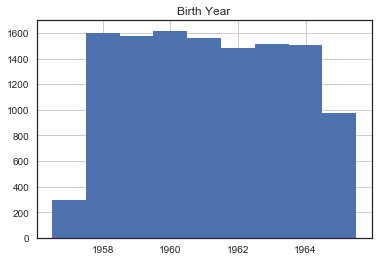

In [3]:
pd.read_sql(con = con, sql = "select 1982-ageatint 'Birth Year' from yearly where y = 1982;")\
  .hist(bins = [1956.5+b for b in range(10)])
    
plt.gca().ticklabel_format(useOffset=False)

In [4]:
df = pd.read_sql(con = con, index_col = "r",
                 sql = """select 
                            static.r,
                            yearly.hgcrev HGC,
                            ffer_92, age1p, age1b,
                            aborts, 
                            hgc_mother, hgc_father,
                            (case when (ffer_92 > 0) then ffer_92 else 0 end) as age_first_sex, 
                            rotter_score as rotter,
                            pearlin_zscorecw_percentile/100. as pearlin,
                            rosenberg_zscorecw_percentile/100. as rosenberg
                          from static
                          join yearly on
                            static.r = yearly.r and
                            yearly.y = 2012
                          where 
                            sample_sex = 2;
                       """)

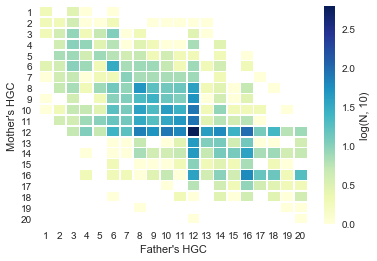

In [5]:
dff = df[(df.hgc_mother > 0) & (df.hgc_father > 0)]

p = dff.groupby(["hgc_mother", "hgc_father"]).count()[["HGC"]]
p.rename(columns = {"HGC" : "count"}, inplace = True)
p.index.set_names(["Mother's HGC", "Father's HGC"], inplace = True)
p = p.unstack()
p.columns = p.columns.droplevel()
# display(np.log10(p))
ax = sns.heatmap(np.log10(p), linewidth = 0.5, cmap = "YlGnBu")

# ax.collections[0].colorbar.set_label("log(N, 10)")
ax.collections[0].colorbar.set_label("log(N, 10)")

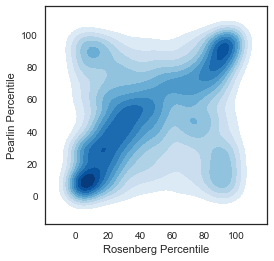

In [6]:
dff = df[(df["rosenberg"] > 0.1) & (df["pearlin"] > 0.1)]
ax = sns.kdeplot(dff["rosenberg"], dff["pearlin"], cmap = "Blues", shade=True, shade_lowest=False)
ax.set_aspect("equal")
ax.set_xlabel("Rosenberg Percentile")
ax.set_ylabel("Pearlin Percentile")

 None,
 None]

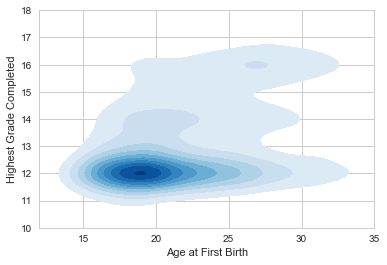

In [7]:
sns.set_style("whitegrid")

dff = df[(df["age1b"] > 11) & (df["HGC"] > 10)]
ax = sns.kdeplot(dff["age1b"], dff["HGC"], cmap = "Blues", 
                 shade=True, shade_lowest=False)
ax.set(xlabel = "Age at First Birth", ylabel = "Highest Grade Completed",
       xbound = (12, 35), ybound = (10, 18))

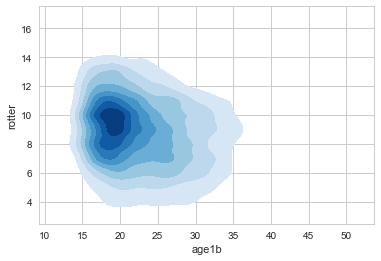

In [8]:
dff = df[(df["age1b"] > 10) & (df["rotter"] > 0)]
sns.kdeplot(dff["age1b"], dff["rotter"], cmap = "Blues", 
            shade=True, shade_lowest=False)

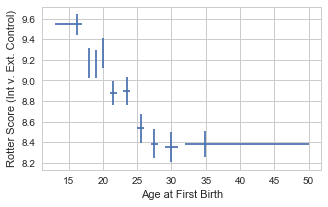

In [9]:
fig, ax = plt.subplots(figsize=(5, 3))
dff = df[(df["age1b"] > 10) & (df["rotter"] > 0)][["age1b", "rotter"]]
binned_df = dff.groupby(pd.qcut(dff["age1b"], 10))
ax.errorbar(x = binned_df.mean()["age1b"], 
            y = binned_df.mean()["rotter"],
            xerr = [binned_df.mean()["age1b"] - binned_df.min()["age1b"], 
                    binned_df.max()["age1b"] - binned_df.mean()["age1b"]],
            yerr = binned_df.std()["rotter"] / np.sqrt(binned_df.count()["rotter"]), 
            fmt="none", figsize = (5, 3))
ax.set(xlabel = "Age at First Birth", ylabel = "Rotter Score (Int v. Ext. Control)")

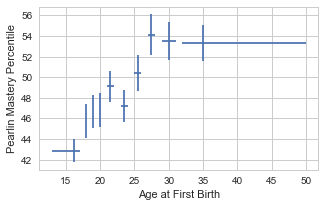

In [10]:
# Fix the start date: -3 for abortions and miscarriages; -9 months for pregnancies.
fig, ax = plt.subplots(figsize=(5, 3))
dff = df[(df["age1b"] > 10) & (df["pearlin"] > 0)]
binned_df = dff.groupby(pd.qcut(dff["age1b"], 10))
ax.errorbar(x = binned_df.mean()["age1b"], 
            y = binned_df.mean()["pearlin"],
            xerr = [binned_df.mean()["age1b"] - binned_df.min()["age1b"], 
                    binned_df.max()["age1b"] - binned_df.mean()["age1b"]],
            yerr = binned_df.std()["pearlin"] / np.sqrt(binned_df.count()["pearlin"]), 
            fmt="none", figsize = (5, 3))
ax.set(xlabel = "Age at First Birth", ylabel = "Pearlin Mastery Percentile")

 None,
 None]

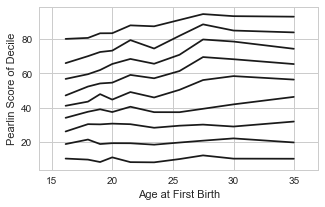

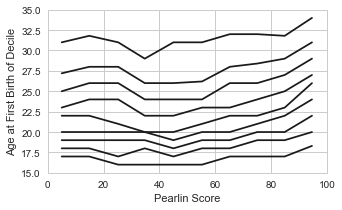

In [11]:
binned_df = dff.groupby(pd.qcut(dff["age1b"], 10))

fig, ax = plt.subplots(figsize=(5, 3))
bdf = binned_df[["age1b"]].mean()
for q in [0.1*qi for qi in range(1, 10)]:
    binned_df[["pearlin"]].quantile(q)
    bdf["pearlin"] = binned_df["pearlin"].quantile(q)
    bdf.plot(x = bdf["age1b"], y = "pearlin", c = "k", ax = ax, legend = False)
ax.set(ylabel = "Pearlin Score of Decile", xlabel = "Age at First Birth", xbound = (14, 37))


binned_df = dff.groupby(pd.cut(dff["pearlin"], 10))

fig, ax = plt.subplots(figsize=(5, 3))
bdf = binned_df[["age1b", "pearlin"]].mean()
for q in [0.1*qi for qi in range(1, 10)]:
    bdf["age1b"] = binned_df["age1b"].quantile(q)
    bdf.plot(x = bdf["pearlin"], y = "age1b", c = "k", ax = ax, legend = False)
ax.set(xlabel = "Pearlin Score", ylabel = "Age at First Birth of Decile", 
       xbound = (0, 100), ybound = (15, 35))

/home/jsaxon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


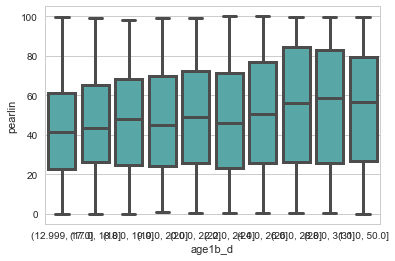

In [12]:
dff["age1b_d"] = pd.qcut(dff['age1b'], 10)
ax = sns.boxplot(x = "age1b_d", y = "pearlin", data = dff, 
                 linewidth = 3, color = "aqua", saturation = 0.3)
# ax.set(xlabel = "Age at First Birth", ylabel = "Pearlin Mastery Percentile")

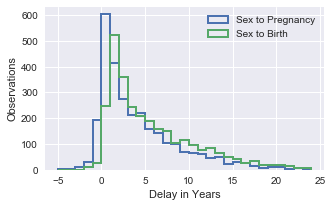

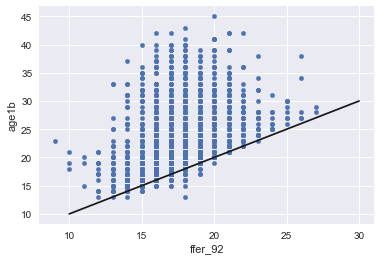

In [13]:
sns.set_style("darkgrid")

df["Sex to Birth"] = df["age1b"] - df["ffer_92"]
df["Sex to Pregnancy"] = df["age1p"] - df["ffer_92"]
dff = df[(df["age1b"] > 0) & (df["age1p"] > 0) & (df["ffer_92"] > 0)]

fig, ax = plt.subplots(figsize=(5, 3))
dff[["Sex to Pregnancy", "Sex to Birth"]].plot.hist(bins = [b-5 for b in range(30)], ax = ax, 
                                                   linewidth = 2, histtype = "step")
ax.set(xlabel = "Delay in Years", ylabel = "Observations")

ax = dff.plot(kind = "scatter", x = "ffer_92", y = "age1b")
plt.plot([10, 30], [10, 30], 'k-')

Break this up by age at first birth and demographics.

So, like, our sex-ed is _really_ bad!!  ;-)

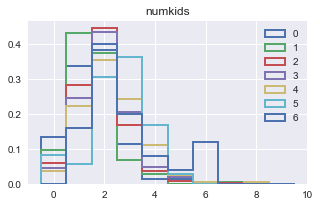

,age82,numkids,expkids,pearlin
expkids,,,,
0,19.878981,1.605096,0.0,42.147389
1,20.218085,1.526596,1.0,43.123617
2,20.024074,1.872222,2.0,44.203185
3,20.048780,2.040650,3.0,45.249675
4,19.798995,2.336683,4.0,47.508844
5,19.361111,2.555556,5.0,51.424444
6,19.920000,2.800000,6.0,46.098400
7,20.500000,2.500000,7.0,29.920000
8,22.000000,2.000000,8.0,48.695000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2fee28240>]], dtype=object)

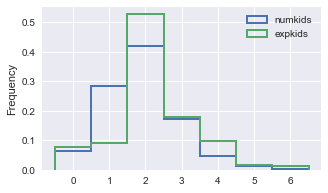

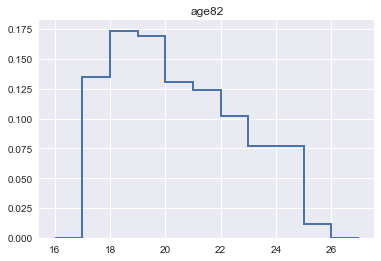

In [14]:
sns.set_style("darkgrid")

df = pd.read_sql(con = con,
                 sql = """
                       select
                         ageatint age82,
                         numkid numkids,
                         fer_3 expkids,
                         pearlin_zscorecw_percentile/100. as pearlin
                       from static 
                       join exp on
                         static.r = exp.r and exp.y = 1982
                       join yearly on
                         static.r = yearly.r and yearly.y = 1982
                       where
                         sample_sex = 2 and 
                         ageatint < age1p and
                         numkids >= 0 and
                         expkids >= 0;
                       """)

fig, ax = plt.subplots(figsize=(5, 3))
for l, g in df.groupby(df["expkids"].astype(int)):
    if g.shape[0] < 10: continue 
    g[["numkids"]].hist(bins = 10, range = (-0.5, 9.5),
                        ax = ax, label = str(l), linewidth = 2,
                        normed = True, histtype = "step")
plt.legend(loc = "upper right") # not readable¡
plt.show()

display(df.groupby(df["expkids"].astype(int)).mean())

# df["expkids_i"] = df["expkids"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 3))
# for l, g in df.groupby(df["expkids"].astype(int)):
#     if not g.shape[0] > 1: continue
#     g.plot(kind = "kde", sharex = True, x = 'expkids_i', y = 'numkids', label = l, ax = ax)
fig, ax = plt.subplots(figsize=(5, 3))
df[["numkids", "expkids"]].plot.hist(bins = [-0.5+b for b in range(8)], linewidth = 2, histtype = "step", normed = True, ax = ax)

df[["age82"]].hist(bins = [16+b for b in range(12)], linewidth = 2, histtype = "step", normed = True)

 None,

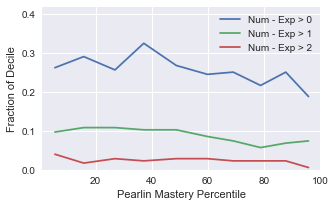

In [15]:
sns.set_style("darkgrid")

df["diffkid"] = df["numkids"] - df["expkids"]
df["diffkid0"] = df["diffkid"] > 0
df["diffkid1"] = df["diffkid"] > 1
df["diffkid2"] = df["diffkid"] > 2

fig, ax = plt.subplots(figsize=(5, 3))
dff = df[df["pearlin"] > 0.1]
g = dff.groupby(pd.qcut(dff["pearlin"], 10))
for n in [0, 1, 2]:
    plt.plot(list(g.mean()["pearlin"]), list(g.mean()["diffkid" + str(n)]),
             label = "Num - Exp > " + str(n))
plt.legend()
    
ax.set(xlabel = "Pearlin Mastery Percentile", ylabel= "Fraction of Decile", ybound = (0, 0.42))

Do robust errors on this.

In [16]:
df["diffkid0"] = df["diffkid"] > 0
df["diffkid1"] = df["diffkid"] > 1
df["diffkid2"] = df["diffkid"] > 2
dff = df[df["pearlin"] > 0.1]
g = dff.groupby(pd.qcut(dff["pearlin"], 10))
g['diffkid0'].mean()

pearlin
(0.289, 10.737]     0.262857
(10.737, 21.286]    0.291429
(21.286, 31.527]    0.257143
(31.527, 43.458]    0.325714
(43.458, 55.09]     0.268571
(55.09, 64.908]     0.245714
(64.908, 74.115]    0.251429
(74.115, 83.226]    0.217143
(83.226, 91.861]    0.251429
(91.861, 99.96]     0.188571
Name: diffkid0, dtype: float64

In [17]:
display(pd.read_sql(con = con, 
                    sql = "select sample_race, avg(aborts) from static where aborts >= 0 group by sample_race;"))
display(pd.read_sql(con = con, 
                    sql = "select outcome, avg(using_contracep) from fer where using_contracep >= 0 group by outcome;"))

display(pd.read_sql(con = con, 
                    sql = """select 
                               sample_race, 
                               avg(mwanted == 1) "Wanted",
                               avg(mwanted == 2) "Didn't Care", 
                               avg(mwanted == 3) "Not Now", 
                               avg(mwanted == 4) "Not at All"
                             from static, fer
                             where 
                               static.r = fer.r and 
                               mwanted > 0
                             group by sample_race
                             ;"""
                   ))

display(pd.read_sql(con = con, 
                    sql = """select 
                               sample_race, 
                               avg(matched > 0)
                             from static, fer
                             where 
                               static.r = fer.r
                             group by sample_race
                             ;"""
                   ))

,sample_race,avg(aborts)
0,1,0.324296
1,2,0.307895
2,3,0.253419


,outcome,avg(using_contracep)
0,A,0.413793
1,L,0.175370
2,M,0.236746


,sample_race,Wanted,Didn't Care,Not Now,Not at All
0,1,0.612088,0.040144,0.244475,0.103293
1,2,0.379408,0.049748,0.384761,0.186083
2,3,0.611111,0.044808,0.267181,0.076900


,sample_race,avg(matched > 0)
0,1,0.883802
1,2,0.874639
2,3,0.904223


In [18]:
df = pd.read_sql(con = con, index_col = "Pearlin Mastery Decile",
                 sql = """select 
                            1 + pearlin_zscorecw_percentile/1000 as "Pearlin Mastery Decile",
                            outcome,
                            avg(mwanted == 1) "Wanted",
                            avg(mwanted == 2) "Didn't Care", 
                            avg(mwanted == 3) "Not Now", 
                            avg(mwanted == 4) "Not at All"
                          from static 
                          join fer on 
                            static.r = fer.r
                          where 
                            mwanted > 0 
                          group by "Pearlin Mastery Decile", outcome;
                       """)

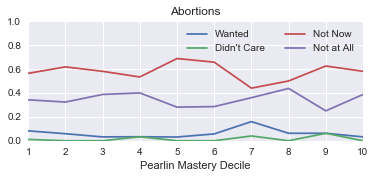

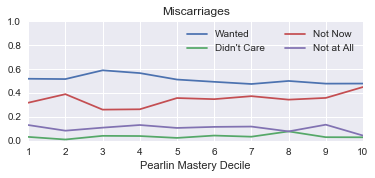

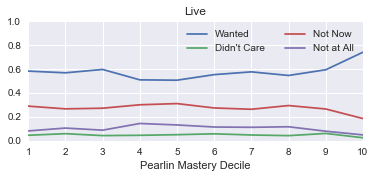

In [19]:
sns.set()
for o in ["Abortions", "Miscarriages", "Live"]:
    ax = df[df["outcome"] == o[0]].plot(figsize = (6, 2.2))
    ax.set(title = o, ybound = (0, 1))
    plt.legend(loc = "upper right", ncol = 2)

### So check ...
* Basic outcomes (HS graduation, ever convicted YASR-62A, jail YASR-66) --- hstdegree_dli based on whether they were wanted.
* Basic outcomes on mother's age.
* Outcomes for first born for mother's age at first pregnancy, with and without miscarriages or abortions (i.e., does the extra time "help"?)
* Time from miscarriage to live birth as a function of age1p.

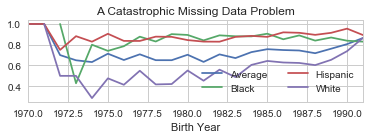

In [20]:
sns.set_style("whitegrid")

df = pd.read_sql(con = con, 
                 sql = """select
                            cyrb, crace,
                            hstdegree_dli >= 0 'Valid Data'
                          from cya_static 
                          where cyrb > 0 and cyrb < 1992;""")

df["crace"] = df["crace"].map({1 : "Black", 2 : "Hispanic", 3 : "White"})
ax = df.groupby("cyrb").mean().plot(y = "Valid Data", label = "Average", figsize = (6, 1.5), 
                                    title = "A Catastrophic Missing Data Problem")

for l in ["Black", "Hispanic", "White"]:
    df[df['crace'] == l].groupby("cyrb").mean().plot(y = "Valid Data", label = l, ax = ax)

ax.set(xlabel = "Birth Year")
plt.legend(ncol = 2, loc = "lower right")

* Surprizing breakdown by race.  I guess (richer?) whites are getting tired of responding to the survey for $5?
* I just don't know what to do about this.  It's basically all -7, noninterview (presumably) or valid skip.

In [21]:
df = pd.read_sql(con = con, index_col = "mwanted",
                 sql = """select 
                            mwanted,
                            1.*sum(hstdegree_dli > 1  AND 2012 - cyrb >= 20)/sum(2012 - cyrb >= 20) HS_avg,
                            sum(2012 - cyrb >= 20) HS_N, 
                            1.*sum(hstdegree_dli >= 1 AND 2012 - cyrb >= 22)/sum(2012 - cyrb >= 22) HS_eq_avg,
                            sum(2012 - cyrb >= 22) HS_eq_N, 
                            1.*sum(hstdegree_dli > 3  AND 2012 - cyrb >= 24)/sum(2012 - cyrb >= 24) BA_avg,
                            sum(2012 - cyrb >= 24) BA_N
                          from cya_static
                          join fer on 
                            cya_static.r = fer.r and
                            cya_static.c = fer.p
                          where 
                            mwanted > 0 and
                            hstdegree_dli >= 0
                          group by mwanted;
                       """)

,HS Diploma,HS_N,HS Equivalency,HS_eq_N,Bachelor's,BA_N
Mother's Intentions,,,,,,
Wanted,0.791486,3453,0.890020,3046,0.187427,2561
Didn't Care,0.750865,289,0.860082,243,0.125604,207
Not Now,0.739063,1943,0.874723,1804,0.149909,1641
Didn't Want,0.717460,630,0.883848,551,0.116424,481


[<matplotlib.text.Text at 0x7ff2ff367828>, None]

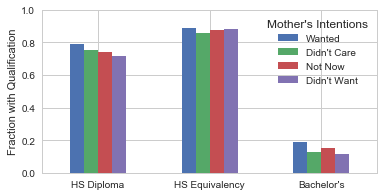

In [22]:
df.index.rename("Mother's Intentions", inplace = True)

df.rename(index = {1 : "Wanted", 2 : "Didn't Care", 3 : "Not Now", 4 : "Didn't Want"}, inplace = True)
dff = df.rename(columns = {"HS_avg" : "HS Diploma", "HS_eq_avg" : "HS Equivalency", "BA_avg" : "Bachelor's"})

display(dff)

ax = dff[[c for c in dff.columns if "_" not in c]].T.plot.bar(rot = 0, figsize = (6, 3))
ax.set(ylabel = "Fraction with Qualification", ybound = (0, 1))

Add criminality here?  Would then need to put an upper range, so that Rs are exposed to the same period of exposure/risk = adulthood.

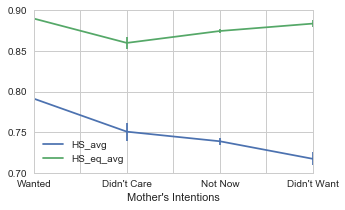

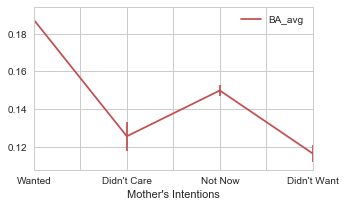

In [23]:
for v in ["HS", "HS_eq", "BA"]:
    df[v + "_err"] = df[v + "_avg"] * (1 - df[v + "_avg"]) / np.sqrt(df[v + "_N"])
    
fig, ax = plt.subplots(figsize=(5, 3))
for v in ["HS", "HS_eq"]: df.plot(kind = "line", y = v + "_avg", yerr = v + "_err", ax = ax)

fig, ax = plt.subplots(figsize=(5, 3))
for v in ["BA"]: df.plot(kind = "line", y = v + "_avg", yerr = v + "_err", c = "r", ax = ax)

In [24]:
# binomial proportion test
# http://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/binotest.htm
def ztest(p1, p2, n1, n2): 
    p = (n1 * p1 + n2 * p2)/(n1 + n2)
    return (p1 - p2)/sqrt(p * (1-p) * (1/n1 + 1/n2))

print("HS Grad, wanted v. unwanted: not so likely --->", ztest(0.791, 0.717, 3453, 630))

HS Grad, wanted v. unwanted: not so likely ---> 4.120558749076142


### Now criminality:
What is the likelihood of being convicted of a crime (YASR-62A) or going to jail (YASR-66), as a function of intentionality or mother's age?  Let's do age, to start.

### Finally ---- high school graduation rates for the eldest child, as a function of the mother's age at first pregnancy, split by the outcome of that first pregnancy.  In other words, does the extra time improve the outcomes of that first child?

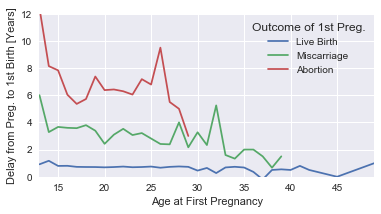

In [25]:
sns.set()

df = pd.read_sql(con = con, index_col = ["out1p", "age1p"],
                 sql = """select 
                            out1p, age1p,
                            avg(age1b - age1p)
                          from static
                          where 
                            age1b > 0 and 
                            age1p > 12 and
                            out1p > 0
                          group by out1p, age1p;
                       """).unstack(level = 0)

df.columns = df.columns.droplevel().rename("Outcome of 1st Preg.")
df.rename(columns = {1 : "Live Birth", 2 : "Miscarriage", 4 : "Abortion"}, inplace = True)
ax = df.plot(figsize = (6, 3))
ax.set(xlabel = "Age at First Pregnancy", ylabel = "Delay from Preg. to 1st Birth [Years]", ybound = (0, 12))
ax

So the delay given a miscarriage is longer than I had thought: upwards of 3 years for teenagers and women in their early twenties.  So it does seem that this serves as a "second chance."
* Should check my coding of outcomes against `out1p`.    

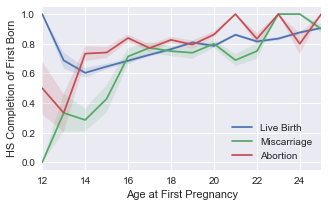

In [26]:
sns.set_style("darkgrid")

df = pd.read_sql(con = con, index_col = ["r"],
                 sql = """select 
                            static.r r,
                            age1p, static.age1b age1b, out1p,
                            hstdegree_dli > 1 HS, cyrb
                          from static
                          join cya_static on 
                            static.r = cya_static.r and
                            bthordr = 1
                          where 
                            age1p > 11 and
                            hstdegree_dli >= 0 and
                            2012 - cyrb > 20 and
                            out1p >= 0
                          ;
                       """)

fig, ax = plt.subplots(figsize=(5, 3))
for vi, v, c in [[1, "Live Birth", "b"], 
                 [2, "Miscarriage", "g"], 
                 [4, "Abortion", "r"]]:

    dfs = df[df["out1p"] == vi]
        
    # bins = sorted(list(set(dfs["age1p"].quantile([0.1*x for x in range(11)]))))
    # dfg = dfs.groupby(pd.cut(dfs["age1p"], bins))
    # dfg = dfs.groupby(pd.qcut(dfs["age1p"], 6))

    dfg = dfs.groupby("age1p")
    dfp = dfg.mean()

    dfp["err"] = dfp["HS"] * (1 - dfp["HS"])/np.sqrt(dfg.count()["HS"])
    
    plt.plot(dfp.index, dfp["HS"], label = v)
    plt.fill_between(dfp.index, dfp["HS"] - dfp["err"], dfp["HS"] + dfp["err"],
                     alpha = 0.15, facecolor = c)

ax.set(xlabel = "Age at First Pregnancy", 
       ylabel = "HS Completion of First Born",
       xbound = (12, 25))
plt.legend(loc = "best")

In [27]:
df.groupby(["age1p", "out1p"])[["out1p"]].count()\
  .rename(columns = {"out1p" : "N"}).unstack()

N            
out1p      1     2     4
age1p                   
12       2.0   2.0   2.0
13      16.0   3.0   3.0
14      53.0   7.0  15.0
15     147.0   7.0  27.0
16     229.0  14.0  31.0
17     233.0  22.0  48.0
18     262.0  32.0  46.0
19     267.0  23.0  34.0
20     163.0  35.0  29.0
21     172.0  29.0  15.0
22     168.0  12.0  12.0
23     139.0  12.0  12.0
24     121.0   8.0   5.0
25     128.0  10.0   2.0
26     113.0  11.0   NaN
27      80.0   5.0   NaN
28      47.0   5.0   NaN
29      50.0   5.0   1.0
30      29.0   NaN   NaN
31      22.0   1.0   NaN
32      11.0   NaN   NaN
33       3.0   NaN   NaN

[<matplotlib.text.Text at 0x7ff2feb62b00>, None]

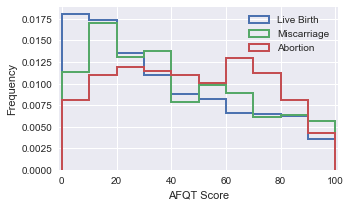

In [28]:
sns.set_style("darkgrid")

df = pd.read_sql(con = con, 
                 sql = """select out1p, afqt_2, static.age1b age1b
                          from static
                          join cya_static on 
                            static.r = cya_static.r and bthordr = 1
                          where age1p > 11 and out1p >= 0;""")

labels = {1 : "Live Birth", 2 : "Miscarriage", 4 : "Abortion"}
fig, ax = plt.subplots(figsize=(5, 3))
for l, g in df.groupby("out1p"):
    g.plot(kind = "hist", y = "afqt_2", label = labels[l], bins = range(0, 101, 10), 
           histtype = "step", ax = ax, normed = True, linewidth = 2)
ax.set(xlabel = "AFQT Score", xbound = (-1, 101))

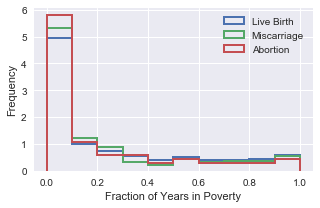

In [29]:
sns.set_style("darkgrid")

df = pd.read_sql(con = con, 
                 sql = """select out1p, avg(povstatus) "Poverty Fraction"
                          from static 
                          join yearly on 
                            static.r = yearly.r
                          join cya_static on
                            static.r = cya_static.r and
                            bthordr = 1
                          where 
                            out1p in (1, 2, 4) and 
                            povstatus >= 0 and
                            cyrb <= y and y <= cyrb + 18
                          group by static.r
                          having count(povstatus) > 5;""")

labels = {1 : "Live Birth", 2 : "Miscarriage", 4 : "Abortion"}
fig, ax = plt.subplots(figsize=(5, 3))
for l, g in df.groupby("out1p"):
    g.plot(kind = "hist", y = "Poverty Fraction", label = labels[l], bins = 10, 
           histtype = "step", ax = ax, normed = True, linewidth = 2)
ax.set(xlabel = "Fraction of Years in Poverty")

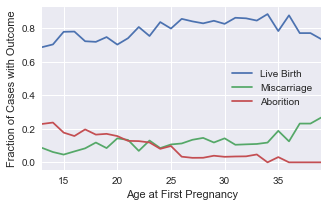

In [30]:
ax = pd.read_sql(con = con, index_col = "age1p",
                 sql = """select 
                            age1p, 
                            avg(out1p == 1) "Live Birth",
                            avg(out1p == 2) "Miscarriage",
                            avg(out1p == 4) "Aborition"
                          from static
                          where 
                            age1p > 10 and
                            out1p in (1, 2, 4)
                          group by age1p
                          having count(age1p) > 10;""").plot(figsize = (5, 3))

ax.set(xlabel = "Age at First Pregnancy", ylabel = "Fraction of Cases with Outcome")

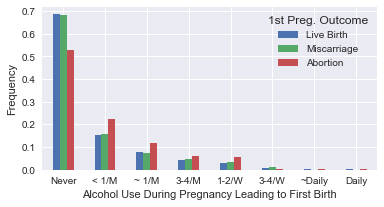

In [31]:
sns.set_style("darkgrid")

df = pd.read_sql(con = con, index_col = "1st Preg. Outcome", 
                 sql = """select out1p "1st Preg. Outcome",
                            avg(PRE0010 == 0 OR PRE0011 == 0) "Never", 
                            avg(PRE0011 == 1) "< 1/M",
                            avg(PRE0011 == 2) "~ 1/M",
                            avg(PRE0011 == 3) "3-4/M",
                            avg(PRE0011 == 4) "1-2/W",
                            avg(PRE0011 == 5) "3-4/W",
                            avg(PRE0011 == 6) "~Daily",
                            avg(PRE0011 == 7) "Daily"
                          from static
                          join cya_static on 
                            static.r = cya_static.r and bthordr = 1
                          where 
                            age1p > 11 and out1p >= 0 and
                            (PRE0010 >= 0 or PRE0011 >= 0)
                          group by out1p;""")

df.rename(index = {1 : "Live Birth", 2 : "Miscarriage", 4 : "Abortion"}, inplace = True)
ax = df.T.plot.bar(rot = 0, figsize = (6, 3))
ax.set(xlabel = "Alcohol Use During Pregnancy Leading to First Birth", ylabel = "Frequency")

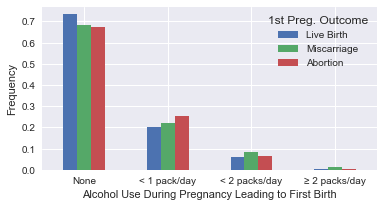

In [32]:
sns.set_style("darkgrid")

df = pd.read_sql(con = con, index_col = "1st Preg. Outcome", 
                 sql = """select out1p "1st Preg. Outcome",
                            avg(PRE0012 == 0 OR PRE0013 == 0) "None", 
                            avg(PRE0013 == 1) "< 1 pack/day",
                            avg(PRE0013 == 2) "< 2 packs/day",
                            avg(PRE0013 == 3) "≥ 2 packs/day"
                          from static
                          join cya_static on 
                            static.r = cya_static.r and bthordr = 1
                          where 
                            age1p > 11 and out1p >= 0 and
                            (PRE0012 >= 0 or PRE0013 >= 0)
                          group by out1p;""")

df.rename(index = {1 : "Live Birth", 2 : "Miscarriage", 4 : "Abortion"}, inplace = True)
ax = df.T.plot.bar(rot = 0, figsize = (6, 3))
ax.set(xlabel = "Smoking During Pregnancy", ylabel = "Frequency")
ax.set(xlabel = "Alcohol Use During Pregnancy Leading to First Birth", ylabel = "Frequency")

* How does family size compare for these different groups?
* Make the plots as a function of the age of the mother at birth (i.e., do they converge)?
* **Criminality?**  Jobs?  The children's fertility histories.
  * Start with criminality since the variables are in place.  The problem is assigning equal exposure times/risks for crime.

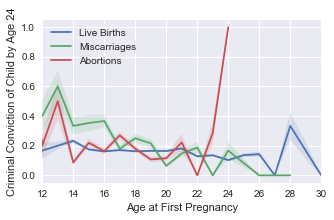

In [33]:
df = pd.read_sql(con = con, index_col = ["r"],
                 sql = """select
                            cya_self.r, cya_self.c,
                            static.age1p, out1p,
                            sum(yasr_62a > 0 and ageint <= 24) > 0 crimrec,
                            max(ageint) maxage
                          from cya_self
                          join static on static.r = cya_self.r
                          join cya_yearly on
                            cya_self.r = cya_yearly.r and
                            cya_self.c = cya_yearly.c and
                            cya_self.y = cya_yearly.y
                          where
                            age1p >= 0 and
                            yasr_62a is not null 
                          group by
                            cya_self.r, cya_self.c
                          having
                            max(ageint) > 24
                          ;
                       """)

fig, ax = plt.subplots(figsize=(5, 3))
for vi, v, c in [[1, "Live Births", "b"], 
                 [2, "Miscarriages", "g"], 
                 [4, "Abortions", "r"]]:

    dfg = df[df["out1p"] == vi].groupby("age1p")
    dfp = dfg.mean()

    dfp["err"] = dfp["crimrec"] * (1 - dfp["crimrec"]) / \
                 np.sqrt(dfg.count()["crimrec"])
    
    plt.plot(dfp.index, dfp["crimrec"], label = v)
    plt.fill_between(dfp.index, 
                     dfp["crimrec"] - dfp["err"], 
                     dfp["crimrec"] + dfp["err"],
                     alpha = 0.15, facecolor = c)

ax.set(xlabel = "Age at First Pregnancy", 
       ylabel = "Criminal Conviction of Child by Age 24",
       xbound = (12, 30))
plt.legend(loc = "best")

Miscarriages v. income of family growing up.

,match,s2p,s2b
outcome,,,
A,0.317427,2.155602,8.597510
L,0.991468,4.067975,4.796359
M,0.963889,3.427778,6.638889


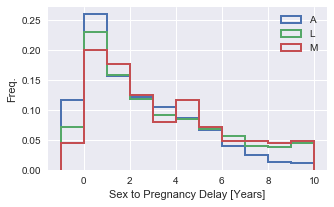

In [34]:
df = pd.read_sql(con = con, index_col = "r",
                 sql = """select
                            static.r, 
                            static.age1b - static.ffer_92 s2b,
                            static.age1p - static.ffer_92 s2p,
                            end_date, outcome, mwanted, matched > 0 as match
                          from fer 
                          join (select r, min(end_date) date from fer group by r) fstpr on
                            fer.r = fstpr.r and fer.end_date = fstpr.date
                          join static on
                            static.r = fer.r
                          where
                            fstpr.date < "1992-01-01" and
                            age1p > 0 and age1b > 0
                          ;
                       """)

display(df[["outcome", "match", "s2p", "s2b"]].groupby("outcome").mean())
        
# display(df[].groupby("outcome").mean())
fig, ax = plt.subplots(figsize=(5, 3))
for l, g in df.groupby("outcome"): 
    g["s2p"].hist(bins = [-1+b for b in range(12)], normed = True,
                  linewidth = 2, histtype = "step", label = l, ax = ax)
plt.legend()
ax.set(xlabel = "Sex to Pregnancy Delay [Years]", ylabel = "Freq.")

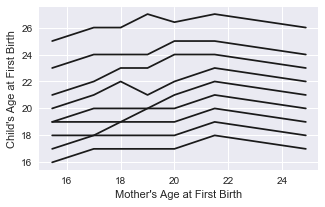

In [35]:
df = pd.read_sql(con = con, 
                 sql = """select
                            static.r,
                            static.age1b MC1,
                            cya_static.age1b CC1
                          from static
                          join cya_static on
                            static.r = cya_static.r
                          where MC1 > 0 and CC1 > 0
                          ;
                       """)


bdf = df.groupby(pd.qcut(df["MC1"], 7))

fig, ax = plt.subplots(figsize=(5, 3))
# print(bdf["MC1"])
for q in [0.1*q for q in range(1, 10)]:
    plt.plot(list(bdf["MC1"].mean()), 
             list(bdf["CC1"].quantile(q)), 
             c = "k")
    # print(binned_df["CC1"].quantile(q))
    
ax.set(xlabel = "Mother's Age at First Birth",
       ylabel = "Child's Age at First Birth")

There's something fishy with this turnover.

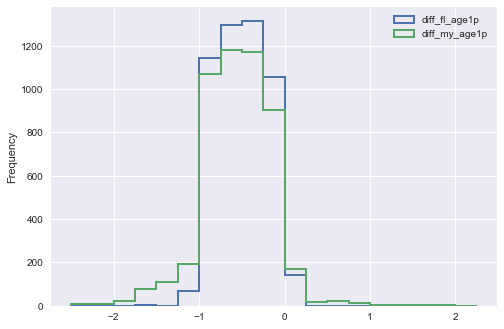

In [36]:
df = pd.read_sql(con = con, index_col = "r", 
                 sql = """select
                            static.r,
                            (julianday(bg1p) - julianday(static.rdob))/365.25 fl_age1p,
                            age1p, 
                            age1p - (julianday(bg1p) - julianday(static.rdob))/365.25 diff_fl_age1p,
                            (julianday(fpr) - julianday(static.rdob))/365.25 my_age1p,
                            age1p - (julianday(fpr) - julianday(static.rdob))/365.25 diff_my_age1p
                          from static
                          join (
                            select r, min(start_date) fpr from fer group by r
                          ) mfer on 
                            static.r = mfer.r
                          where
                            age1p > 0
                          ;
                       """)
df.plot.hist(y = ["diff_fl_age1p", "diff_my_age1p"], histtype = "step",
             linewidth = 2, bins = [-2.5+0.25*b for b in range(20)])

* Need to check number expected/achieved v. intentionality.
* Add number and relationship of spouse partner...
* Try to prevent.
* Planning MFER-10, Q9-63; trying to prevent FFER-140, MFER-14 and MFER-29, Q9-66.